# Storytelling Data Visualization Lab

In this lab you'll use a dataset called `housing_prices.csv` which contains the sales data of houses. The dataset and descriptions of the columns are available from [Kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data). For your convenience, you can review the descriptions of the data columns from [here](data-description.txt).

Pretend you are a data analyst at an investment company where the board decided to make investments in real estates. Your boss asked you to analyze this housing sales dataset and present to the investment managers on **what features of houses are strong indicators of the final sale price**. You need to present your findings in intuitive ways so that the investment managers understand where your conclusions come from.

#### You will use the appropriate data visualization graphs to tell your stories.

## Challenge 1 - Understanding the Dataset

After receiving the data and clarifying your objectives with your boss, you will first try to understand the dataset. This allows you to decide how you will start your research in the next step.

#### First, import the basic libraries and the dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.offline as py
import cufflinks as cf
from ipywidgets import interact
py.init_notebook_mode(connected=True)
import plotly.graph_objects as go
import plotly.express as px


cf.go_offline()

df = pd.read_csv('housing_prices.csv')

#### As a routine before analyzing a dataset, print the first few rows of the dataset

In [2]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


You find the dataset has 81 columns which are a lot. 

#### Since the column `Id` is meaningless in our data visualization work, let's drop it

In [3]:
# your code here
df = df.drop('Id', axis=1)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


You care about missing values. If a column has too many missing values, it is not reliable to use it to predict sales price.

#### In the cell below, calculate the percentage of missing values for each column. 

Make a table containing the column name and the percentage of missing values. Print the columns where more than 20% of values are missing. An example of your output looks like:

![Missing Values](missing-values.png)

[This reference](https://stackoverflow.com/questions/51070985/find-out-the-percentage-of-missing-values-in-each-column-in-the-given-dataset) can help you make the missing values table.

In [4]:
# your code here
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})

missing_value_df.sort_values('percent_missing', inplace=True, ascending = False)

df_missing = pd.DataFrame(missing_value_df)
df_missing_20 = df_missing.loc[df_missing.percent_missing > 20]
df_missing_20

,column_name,percent_missing
PoolQC,PoolQC,99.520548
MiscFeature,MiscFeature,96.301370
Alley,Alley,93.767123
Fence,Fence,80.753425
FireplaceQu,FireplaceQu,47.260274


#### Drop the columns you find that have more than 20% missing values.

After dropping, check the shape of your dataframes. You should have 75 columns now.

In [5]:
# your code here

col_drop = df_missing_20.column_name

for col in col_drop:
    df = df.drop(col, axis=1)
    

In [6]:
df.shape

(1460, 75)

Since you're asked to analyze sale prices, first let's see if the sale prices (column `SalePrice`) has a normal distribution. This is important because normally distributed data can be better represented with mathematical models.

#### In the cell below, use the propriate graph to visualize the shape of distribution of the sale prices. Then explain what you find from the graph about data distribution.

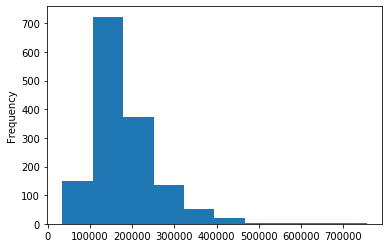

In [7]:
# your code here
df.SalePrice.plot(kind="hist")


In [8]:
# your comment here

"""
the data distribution is skewed to the right
it's normal to have more houses for the lower price and less for the higher
the majority of the house prices range from around 30000 to 250000
"""

"\nthe data distribution is skewed to the right\nit's normal to have more houses for the lower price and less for the higher\nthe majority of the house prices range from around 30000 to 250000\n"

## Bonus Challenge 1 - Adjust Data Distribution

If you used the correct method in the previous step, you should have found the data distribution is skewed to the left. In order to improve your data visualization in the next steps, you can opt to adjust the `SalePrice` column by applying a mathematical function to the values. The goal is to produce a bell-shape normal distribution after applying the mathematical function to the sale price.

*This technique is optional in data visualization but you'll find it useful in your future machine learning analysis.*

#### In the cell below, adjust the `SalePrice` column so that the data are normally distributed.

Try applying various mathematical functions such as square root, power, and log to the `SalePrice` column. Visualize the distribution of the adjusted data until you find a function that makes the data normally distributed. **Create a new column called `SalePriceAdjusted` to store the adjusted sale price.**

[This reference](https://trainingdatascience.com/workshops/histograms-and-skewed-data/) shows you examples on how to adjust skewed data.

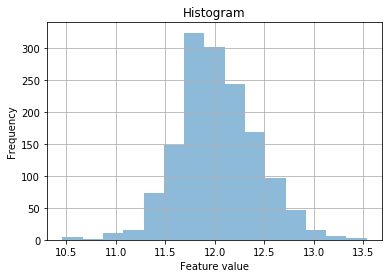

In [9]:
# your code here

df_exp = df.SalePrice.apply(np.log)   # pd.DataFrame.apply accepts a function to apply to each column of the data
df_exp.plot.hist(alpha=0.5, bins=15, grid=True, legend=None)
plt.xlabel("Feature value")
plt.title("Histogram")
plt.show()

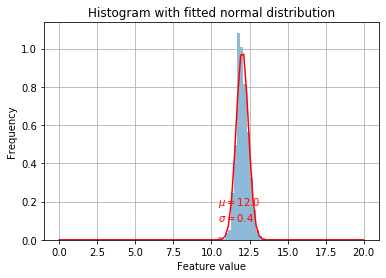

In [10]:
import scipy.stats as stats

param = stats.norm.fit(df_exp)   # Fit a normal distribution to the data

x = np.linspace(0, 20, 100)      # Linear spacing of 100 elements between 0 and 20.
pdf_fitted = stats.norm.pdf(x, *param)    # Use the fitted paramters to create the y datapoints

# Plot the histogram again
df_exp.plot.hist(alpha=0.5, bins=15, grid=True, density=True, legend=None)

# Plot some fancy text to show us what the paramters of the distribution are (mean and standard deviation)
plt.text(x=np.min(df_exp), y=0.1, s=r"$\mu=%0.1f$" % param[0] + "\n" + r"$\sigma=%0.1f$" % param[1], color='r')

# Plot a line of the fitted distribution over the top
plt.plot(x, pdf_fitted, color='r')

# Standard plot stuff
plt.xlabel("Feature value")
plt.title("Histogram with fitted normal distribution")
plt.show()

## Challenge 2 - Exploring Data with Common Sense

Now that we have a general understanding of the dataset, we start exploring the data with common sense by means of data visualization. Yes, in data analysis and even machine learning you are often required to use common sense. You use your common sense to make a scientific guess (i.e. hypothesis) then use data analytics methods to test your hypothesis.

This dataset is about housing sales. According to common sense, housing prices depend on the following factors:

* **Size of the house** (`GrLivArea`, `LotArea`, and `GarageArea`).

* **Number of rooms** (`BedroomAbvGr`, `KitchenAbvGr`, `FullBath`, `HalfBath`, `BsmtFullBath`, `BsmtHalfBath`).

* **How long the house has been built or remodeled** (`YearBuilt` and `YearRemodAdd`).

* **Neighborhood of the house** (`Neighborhood`).

#### In this challenge, use the appropriate graph type to visualize the relationships between `SalePrice` (or `SalePriceAdjusted`) and the fields above. 

Note that:

* Transform certain columns in order to visualize the data properly based on common sense. For example:
    * Visualizing how the number of half bathrooms affected the sale price probably does not make sense. You can create a new column to calculate the total number of bathrooms/rooms then visualize with the calculated number.
    * `YearBuilt` and `YearRemodAdd` are year numbers not the age of the house. You can create two new columns for how long the house has been built or remodeled then visualize with the calculated columns.
* Make comments to explain your thinking process.

In [11]:
# your code here
# add cells as needed
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [12]:
#check only the column that need to work with:
df_select=df.loc[:,['SalePrice', 'GrLivArea', 'LotArea', 'GarageArea', 'BedroomAbvGr', 'KitchenAbvGr', 'FullBath', 
                    'HalfBath', 'BsmtFullBath', 'BsmtHalfBath', 'YearBuilt', 'YearRemodAdd', 'Neighborhood']]

df_select.head()

#column descriptions:

#GrLivArea: Above grade (ground) living area square feet
#LotArea: Lot size in square feet

#BedroomAbvGr: Number of bedrooms above basement level

#FullBath: Full bathrooms above grade
#HalfBath: Half baths above grade
#BsmtFullBath: Basement full bathrooms
#BsmtHalfBath: Basement half bathrooms

#YearBuilt: Original construction date
#YearRemodAdd: Remodel date


,SalePrice,GrLivArea,LotArea,GarageArea,BedroomAbvGr,KitchenAbvGr,FullBath,HalfBath,BsmtFullBath,BsmtHalfBath,YearBuilt,YearRemodAdd,Neighborhood
0,208500,1710,8450,548,3,1,2,1,1,0,2003,2003,CollgCr
1,181500,1262,9600,460,3,1,2,0,0,1,1976,1976,Veenker
2,223500,1786,11250,608,3,1,2,1,1,0,2001,2002,CollgCr
3,140000,1717,9550,642,3,1,1,0,1,0,1915,1970,Crawfor
4,250000,2198,14260,836,4,1,2,1,1,0,2000,2000,NoRidge


In [13]:
#calculating total number of bathrooms

df_select['total_bath']=df_select['FullBath']+df_select['BsmtFullBath']

In [14]:
#calculating the ratio of bathrooms with bedrooms

df_select['bath_ratio']=df_select['total_bath']/df_select['BedroomAbvGr']

In [15]:
df_select.head()

,SalePrice,GrLivArea,LotArea,GarageArea,BedroomAbvGr,KitchenAbvGr,FullBath,HalfBath,BsmtFullBath,BsmtHalfBath,YearBuilt,YearRemodAdd,Neighborhood,total_bath,bath_ratio
0,208500,1710,8450,548,3,1,2,1,1,0,2003,2003,CollgCr,3,1.000000
1,181500,1262,9600,460,3,1,2,0,0,1,1976,1976,Veenker,2,0.666667
2,223500,1786,11250,608,3,1,2,1,1,0,2001,2002,CollgCr,3,1.000000
3,140000,1717,9550,642,3,1,1,0,1,0,1915,1970,Crawfor,2,0.666667
4,250000,2198,14260,836,4,1,2,1,1,0,2000,2000,NoRidge,3,0.750000


In [16]:
#calculating the years since built and remodeled

import datetime

df_select['Current_Year'] = datetime.datetime.now().year
df_select["Years_Since_Built"] = df_select['Current_Year'] - df_select['YearBuilt']
df_select["Years_Since_Remodeled"] = df_select['YearRemodAdd'] - df_select['YearBuilt']

In [17]:
df_select.head()

,SalePrice,GrLivArea,LotArea,GarageArea,BedroomAbvGr,KitchenAbvGr,FullBath,HalfBath,BsmtFullBath,BsmtHalfBath,YearBuilt,YearRemodAdd,Neighborhood,total_bath,bath_ratio,Current_Year,Years_Since_Built,Years_Since_Remodeled
0,208500,1710,8450,548,3,1,2,1,1,0,2003,2003,CollgCr,3,1.000000,2020,17,0
1,181500,1262,9600,460,3,1,2,0,0,1,1976,1976,Veenker,2,0.666667,2020,44,0
2,223500,1786,11250,608,3,1,2,1,1,0,2001,2002,CollgCr,3,1.000000,2020,19,1
3,140000,1717,9550,642,3,1,1,0,1,0,1915,1970,Crawfor,2,0.666667,2020,105,55
4,250000,2198,14260,836,4,1,2,1,1,0,2000,2000,NoRidge,3,0.750000,2020,20,0


In [18]:
#checking correlation

#not sure why here show bath_ratio correlation nan and in matrix there is a value

column = ['GrLivArea', 'LotArea', 'GarageArea', 'BedroomAbvGr', 'total_bath', 'bath_ratio', 
          'Years_Since_Built', 'Years_Since_Remodeled']

for col in column:
    c = df_select['SalePrice'].corr(df_select[col])
    print(f'corr between {col} and sales price is {c}')


corr between GrLivArea and sales price is 0.7086244776126522
corr between LotArea and sales price is 0.26384335387140573
corr between GarageArea and sales price is 0.6234314389183617
corr between BedroomAbvGr and sales price is 0.16821315430073996
corr between total_bath and sales price is 0.5829341127530339
corr between bath_ratio and sales price is nan
corr between Years_Since_Built and sales price is -0.5228973328794969
corr between Years_Since_Remodeled and sales price is -0.21750331522000158


In [19]:
#correlation matrix

column = ['SalePrice', 'GrLivArea', 'LotArea', 'GarageArea', 'BedroomAbvGr', 'total_bath', 
                   'bath_ratio', 'Years_Since_Built', 'Years_Since_Remodeled', 'Neighborhood']

cor_df = df_select.get(column).corr()
cor_df.SalePrice.sort_values(ascending = False)

SalePrice                1.000000
GrLivArea                0.708624
GarageArea               0.623431
total_bath               0.582934
bath_ratio               0.330928
LotArea                  0.263843
BedroomAbvGr             0.168213
Years_Since_Remodeled   -0.217503
Years_Since_Built       -0.522897
Name: SalePrice, dtype: float64

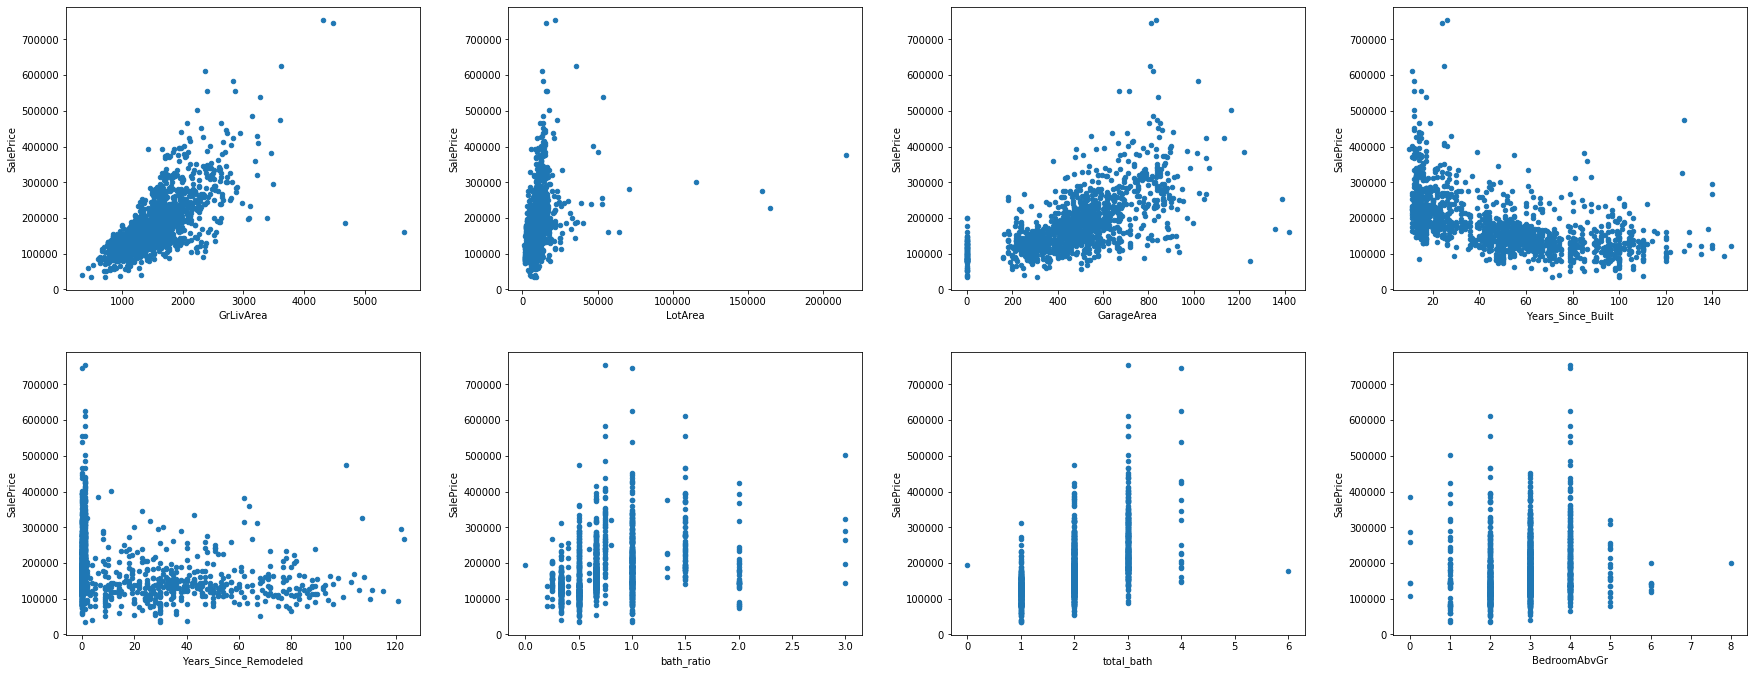

In [20]:
fig = plt.figure(2, figsize = (25,10))

ax1 = fig.add_subplot(2, 4, 1)
df_select.plot.scatter(x = "GrLivArea", y = "SalePrice", ax=ax1)

ax2 = fig.add_subplot(2, 4, 2)
df_select.plot.scatter(x = "LotArea", y = "SalePrice", ax=ax2)

ax3 = fig.add_subplot(2, 4, 3)
df_select.plot.scatter(x = "GarageArea", y = "SalePrice", ax=ax3)     

ax4 = fig.add_subplot(2, 4, 4)
df_select.plot.scatter(x = "Years_Since_Built", y = "SalePrice", ax=ax4)

ax5 = fig.add_subplot(2, 4, 5)
df_select.plot.scatter(x = "Years_Since_Remodeled", y = "SalePrice", ax=ax5)

ax6 = fig.add_subplot(2, 4, 6)
df_select.plot.scatter(x = "bath_ratio", y = "SalePrice", ax=ax6)

ax7 = fig.add_subplot(2, 4, 7)
df_select.plot.scatter(x = "total_bath", y = "SalePrice", ax=ax7)

ax8 = fig.add_subplot(2, 4, 8)
df_select.plot.scatter(x = "BedroomAbvGr", y = "SalePrice", ax=ax8)

fig.tight_layout(pad=3.0)

In [21]:
#checking the count and ave price per Neighborhood:

df.groupby('Neighborhood')['SalePrice'].agg(['count', 'mean', ])

,count,mean
Neighborhood,,
Blmngtn,17,194870.882353
Blueste,2,137500.000000
BrDale,16,104493.750000
BrkSide,58,124834.051724
ClearCr,28,212565.428571
CollgCr,150,197965.773333
Crawfor,51,210624.725490
Edwards,100,128219.700000
Gilbert,79,192854.506329


In [22]:
#checking the total revenue per Neighborhood:

total_revenue = df.groupby('Neighborhood')['SalePrice'].count()*df.groupby('Neighborhood')['SalePrice'].mean()
total_revenue.sort_values(ascending = False)

Neighborhood
NAmes      32815593.0
CollgCr    29694866.0
NridgHt    24352838.0
Somerst    19382666.0
Gilbert    15235506.0
OldTown    14489459.0
NWAmes     13800655.0
NoRidge    13747108.0
Edwards    12821970.0
SawyerW    11006792.0
Crawfor    10741861.0
Sawyer     10122692.0
Timber      9205403.0
StoneBr     7762475.0
Mitchel     7657236.0
BrkSide     7240375.0
ClearCr     5951832.0
IDOTRR      3704580.0
SWISU       3564784.0
Blmngtn     3312805.0
Veenker     2626500.0
MeadowV     1675800.0
BrDale      1671900.0
NPkVill     1284250.0
Blueste      275000.0
Name: SalePrice, dtype: float64

Text(0, 0.5, 'Total Revenue')

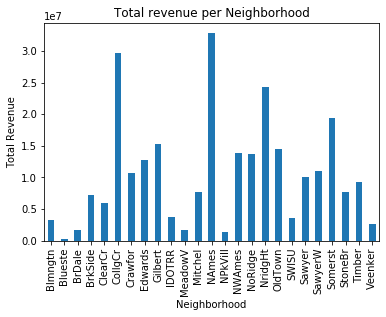

In [23]:
plt.title("Total revenue per Neighborhood")
total_revenue = df.groupby('Neighborhood')['SalePrice'].count()*df.groupby('Neighborhood')['SalePrice'].mean()
total_revenue.plot(kind='bar', rot=90)
plt.xlabel('Neighborhood')
plt.ylabel('Total Revenue')

Text(0, 0.5, 'Total Count')

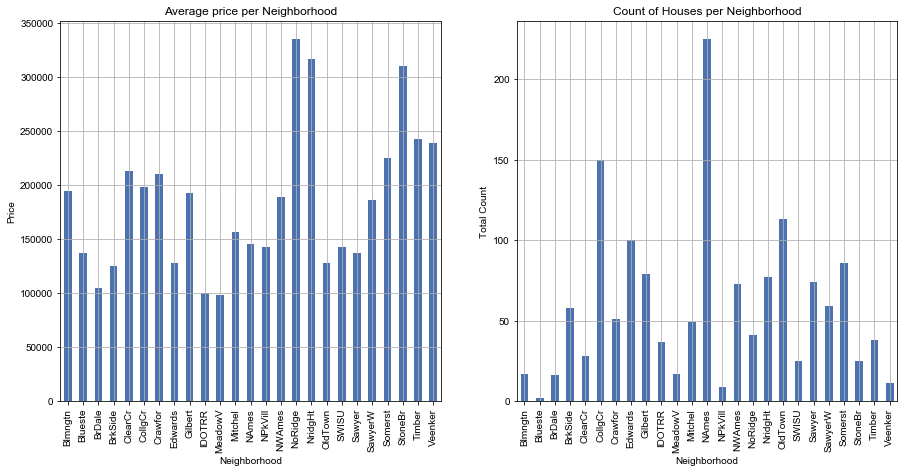

In [24]:
#checking the average prices and total number of houses per Neighborhood

fig, [ax1, ax2] = plt.subplots(1,2, figsize=(15,7)) #figure with two charts
plt.style.use('seaborn')

plt.sca(ax1)

plt.title("Average price per Neighborhood")
price = df.groupby('Neighborhood')['SalePrice'].mean()
price.plot(kind='bar', rot=90)
plt.xlabel('Neighborhood')
plt.ylabel('Price')

plt.sca(ax2)

plt.title("Count of Houses per Neighborhood")
count = df.groupby('Neighborhood')['SalePrice'].count()
count.plot(kind='bar', rot=90)
plt.xlabel('Neighborhood')
plt.ylabel('Total Count')


In [25]:
#or the same with interactive

grouped = df.groupby('Neighborhood')['SalePrice'].agg(['count', 'mean'])
grouped = grouped.reset_index()
grouped.iplot(kind = 'bar', x = 'Neighborhood')

In [26]:
"""
Size of the house: The bigger the house the more expensive it is
Number of rooms: the most expensive houses are those which have 4 rooms, price drops if the house has > than 4 rooms
Number of baths: the most expensive houses are these that have 3 baths
How long the house has been built or remodeled: the older the house and the more years there are after the remodeling 
    the cheaper it is
Neighborhood of the house: The most expensive houses are in NoRidge, NridgHt and StoneBr. 
    But the most of the houses are located in NAmes and CollgCr, 
    therefore if we would sell all the houses that are in these locations, 
    they would be more profitable then mentioned above. 
"""

'\nSize of the house: The bigger the house the more expensive it is\nNumber of rooms: the most expensive houses are those which have 4 rooms, price drops if the house has > than 4 rooms\nNumber of baths: the most expensive houses are these that have 3 baths\nHow long the house has been built or remodeled: the older the house and the more years there are after the remodeling \n    the cheaper it is\nNeighborhood of the house: The most expensive houses are in NoRidge, NridgHt and StoneBr. \n    But the most of the houses are located in NAmes and CollgCr, \n    therefore if we would sell all the houses that are in these locations, \n    they would be more profitable then mentioned above. \n'

## Bonus Challenge 2 - Exploring Data with Correlation Heatmap

Now you have explored data visualizations with certain fields based on common sense. In the dataset there are many other fields that you are not sure whether they are important factors for the sale price. What is the best way to explore those fields without investigating them individually?

Making scatter matrix is not an option here because there are too many fields which makes it extremely time consuming to create scatter matrix. One option you have is to create a heatmap. Heatmaps are much less expensive to create than scatter matrixes. You can use heatmaps to visualize the pairwise correlations between each two variables.

Here is a [reference](https://seaborn.pydata.org/examples/many_pairwise_correlations.html) you can use to learn how to creat the pairwise correlation heatmap. Your heatmap should look like below:

![Corr Heatmap](heatmap.png)

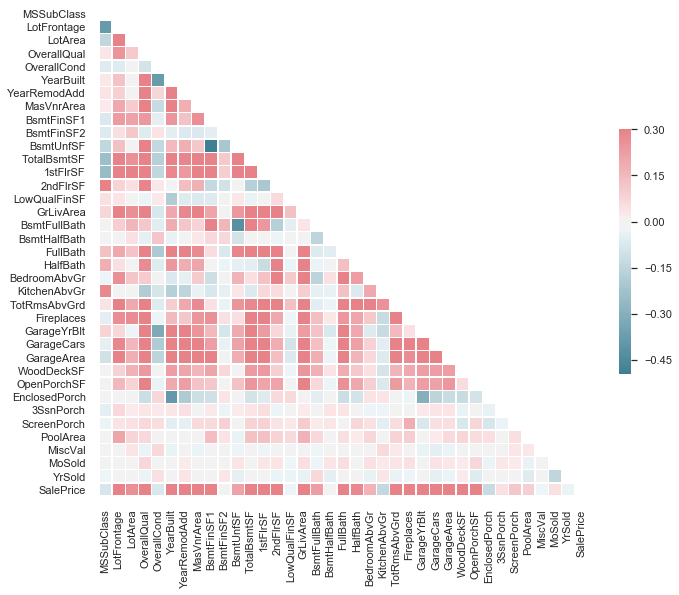

In [27]:
# your code here

from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In your heatmap, you can easily identify the highly correlated (either positively or negatively) variables by looking for the grids with darker colors. 

#### In the cell below, summarize what variables are highly correlated to the sale price?

In [28]:
# your comment here

"""
GrLivArea                
GarageArea               
total_bath               
Years_Since_Built  
LotFrontage
OverallQual
YearBuilt 
YearRemodAdd
MasVnrArea
BsmtFinSF1
TotalBsmtSF
1stFlrSF
2ndFlrSF
TotRmsAbvGrd
Fireplaces
GarageYrBlt
GarageCars
GarageArea
WoodDeckSF
OpenPorchSF
"""


'\nGrLivArea                \nGarageArea               \ntotal_bath               \nYears_Since_Built  \nLotFrontage\nOverallQual\nYearBuilt \nYearRemodAdd\nMasVnrArea\nBsmtFinSF1\nTotalBsmtSF\n1stFlrSF\n2ndFlrSF\nTotRmsAbvGrd\nFireplaces\nGarageYrBlt\nGarageCars\nGarageArea\nWoodDeckSF\nOpenPorchSF\n'

## Challenge 3 - Present Your Stories

Now based on your findings from the explorations, summarize and present your stories.

#### Present the top 5 factors that affect the sale price.

Use the following format to present each factor:

1. A title line about the factor.

1. No more than 3 sentences to describe the relationship between the factor and the sale price.

1. Support your point with the appropriate graph.

In [29]:
# your responses here
# add cells as needed

#what features of houses are strong indicators of the final sale price

"""
Neighborhood
GrLivArea                0.708624
GarageArea               0.623431
total_bath               0.582934
Years_Since_Built       -0.522897
"""

'\nNeighborhood\nGrLivArea                0.708624\nGarageArea               0.623431\ntotal_bath               0.582934\nYears_Since_Built       -0.522897\n'

## Neighborhood impact on final sale price

Neighborhood has a huge impact on the sale price.

From the graph below you can see that the most expensive houses (on average) are in NoRidge, NridgHt and StoneBr.

It's worth checkign the quantity of the houses per neighborhood. You will see that the most of the houses are located in NAmes and CollgCr. Selling all the houses in these neighborhoods is more profitable than selling more expensive houses in not such a popular locations. 


Text(0, 0.5, 'Price')

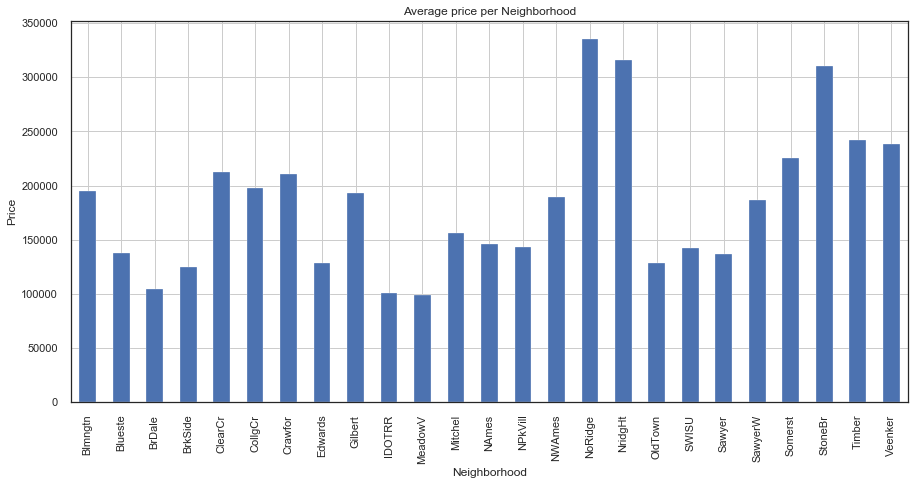

In [30]:
#ave price per neighborhood

fig, ax1 = plt.subplots(1, figsize=(15,7)) 
plt.style.use('seaborn')

plt.sca(ax1)

plt.title("Average price per Neighborhood")
price = df.groupby('Neighborhood')['SalePrice'].mean()
price.plot(kind='bar', rot=90)
plt.xlabel('Neighborhood')
plt.ylabel('Price')


Text(0, 0.5, 'Total Revenue')

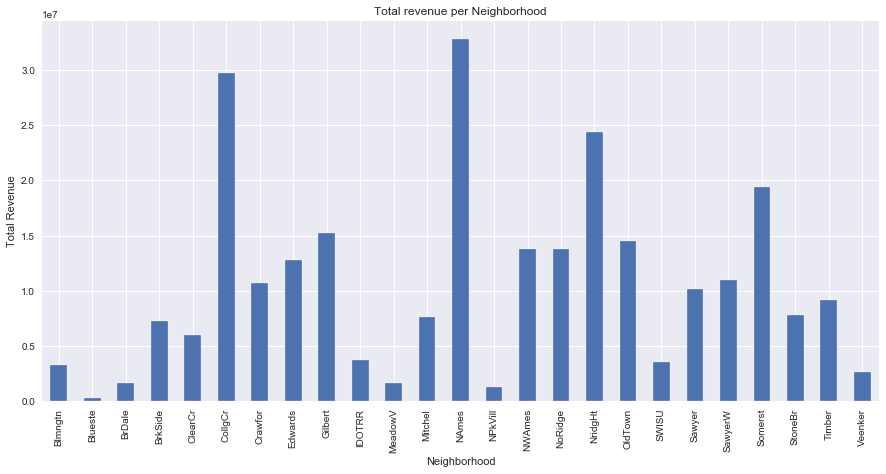

In [31]:
#total revenue per neighborhood

fig, ax1 = plt.subplots(1, figsize=(15,7)) 
plt.style.use('seaborn')

plt.sca(ax1)

plt.title("Total revenue per Neighborhood")
total_revenue = df.groupby('Neighborhood')['SalePrice'].count()*df.groupby('Neighborhood')['SalePrice'].mean()
total_revenue.plot(kind='bar', rot=90)
plt.xlabel('Neighborhood')
plt.ylabel('Total Revenue')

## Total Living Area impact on final sale price

Total Living Area has a high positive correlation with the sale price (0.708624). The bigger the house, the more expensive it is.

From the graph below you can see that the most of the houses range between 100-200 square feet and the sale price range between 100K and 300K. 

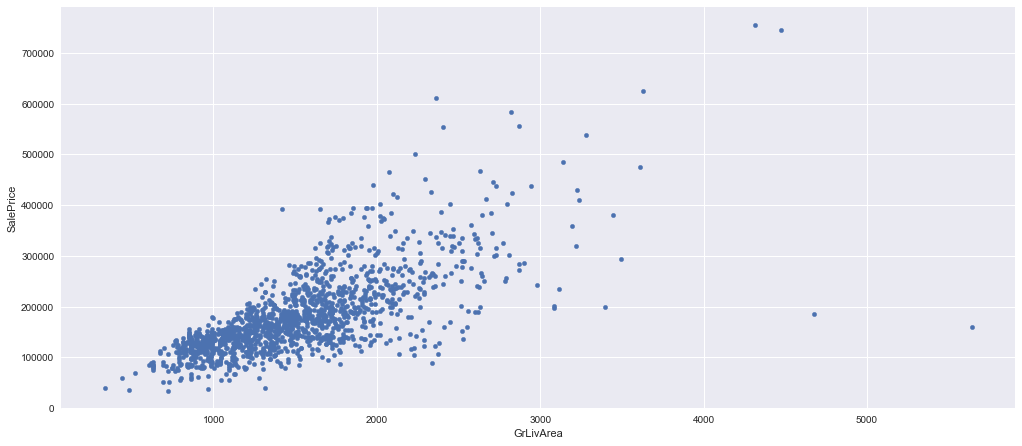

In [32]:
fig = plt.figure(1, figsize = (15,7))

ax1 = fig.add_subplot(1, 1, 1)
df_select.plot.scatter(x = "GrLivArea", y = "SalePrice", ax=ax1)

fig.tight_layout(pad=3.0)

## Garage Area impact on final sale price


Garage Area has a high positive correlation with the sale price (0.623431). The bigger the space, the more expensive the house is.

From the graph below you can see that the most of the garage areas range between 20-60 square feet and the sale price for these houses range between 100K and 300K. 

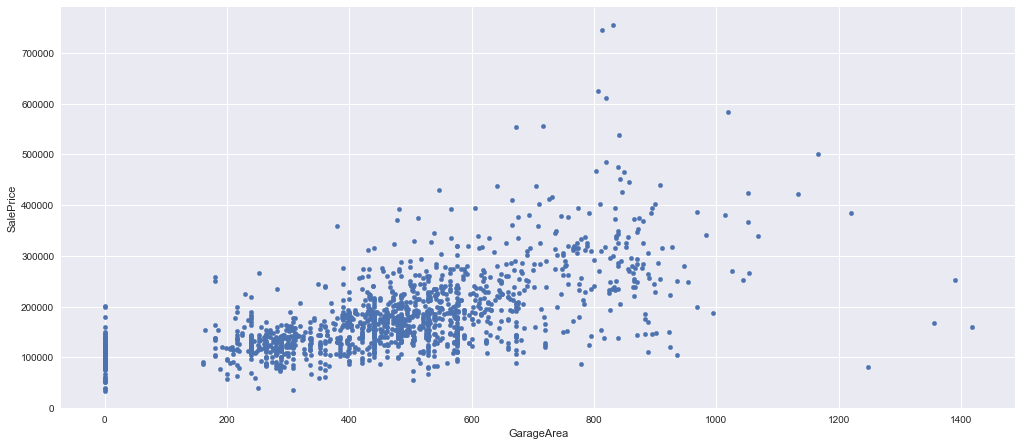

In [33]:
fig = plt.figure(1, figsize = (15,7))

ax1 = fig.add_subplot(1, 1, 1)
df.plot.scatter(x = "GarageArea", y = "SalePrice", ax=ax1)

fig.tight_layout(pad=3.0)

## Total number of baths impact on final sale price

Total number of baths has a high positive correlation with the sale price (0.582934).

From the graph below you can see that the most expensive houses are those that have 3-4 bathrooms. 

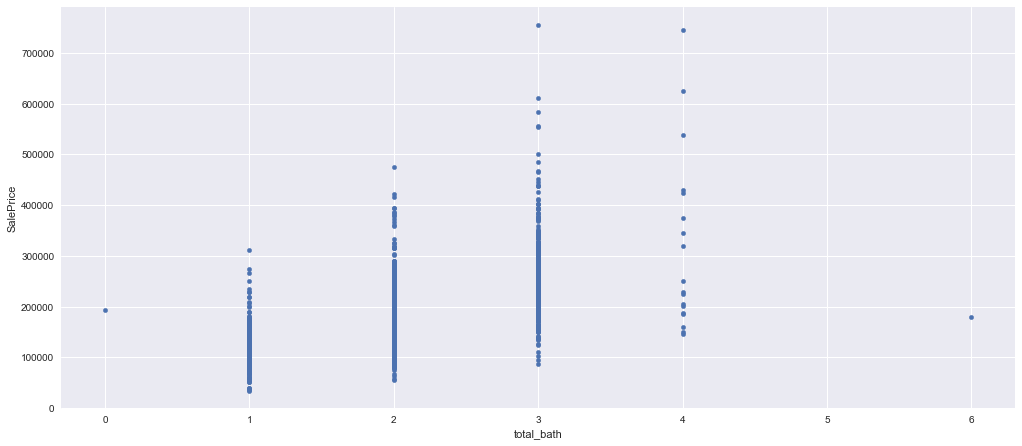

In [34]:
fig = plt.figure(1, figsize = (15,7))

ax1 = fig.add_subplot(1, 1, 1)
df_select.plot.scatter(x = "total_bath", y = "SalePrice", ax=ax1)

fig.tight_layout(pad=3.0)

## Years since built impact on final sale price

Years since built has a high negative correlation with the sale price (-0.522897). The older the house, the cheaper it tends to be.

From the graph below you can see that there are some houses that are more than 120 years old and their price is higher than the newer houses. But that's more of the exception than a rule.


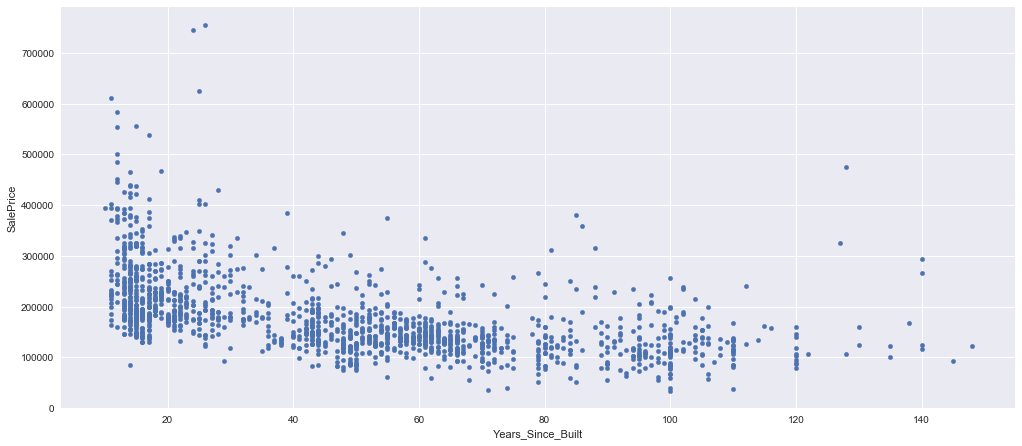

In [35]:
fig = plt.figure(1, figsize = (15,7))

ax1 = fig.add_subplot(1, 1, 1)
df_select.plot.scatter(x = "Years_Since_Built", y = "SalePrice", ax=ax1)
fig.tight_layout(pad=3.0)